In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt

## 2. The Factors

In [8]:
df = pd.read_excel('dfa_analysis_data.xlsx', sheet_name = 1)
df = df.set_index('Date')
df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-31,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2022-04-30,-0.0946,-0.0141,0.0619,0.0001
2022-05-31,-0.0034,-0.0185,0.0841,0.0003
2022-06-30,-0.0843,0.0209,-0.0597,0.0006


In [9]:
factors = df.drop('RF',axis = 1)
factors = df.drop(['2022-08-31'],axis = 0)
factors

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-31,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2022-03-31,0.0305,-0.0160,-0.0180,0.0001
2022-04-30,-0.0946,-0.0141,0.0619,0.0001
2022-05-31,-0.0034,-0.0185,0.0841,0.0003


In [10]:
def summary_stats(df, annual_fac):
    ss_df = (df.mean() * annual_fac).to_frame('Mean')
    ss_df['Volatility'] = df.std() * np.sqrt(annual_fac)
    ss_df['Sharpe'] = ss_df['Mean'] / ss_df['Volatility']
    ss_df['VaR'] = df.quantile(0.05)
    return ss_df.T

In [11]:
print("Subsample period: Beginning - 1980")
summary_stats(factors[:"1980"],12)

Subsample period: Beginning - 1980


,Mkt-RF,SMB,HML,RF
Mean,0.081138,0.033985,0.049479,0.027730
Volatility,0.205050,0.114568,0.133825,0.007671
Sharpe,0.395696,0.296638,0.369727,3.614811
VaR,-0.083985,-0.043400,-0.042910,0.000000


In [12]:
print("Subsample period: 1981 - 2001")
summary_stats(factors["1981":"2001"],12)

Subsample period: 1981 - 2001


,Mkt-RF,SMB,HML,RF
Mean,0.077257,-0.000876,0.063729,0.063076
Volatility,0.157396,0.118434,0.111276,0.007753
Sharpe,0.490847,-0.007398,0.572706,8.135262
VaR,-0.064545,-0.046560,-0.041790,0.002455


In [13]:
print("Subsample period: 2002 - End")
summary_stats(factors["2002":],12)

Subsample period: 2002 - End


,Mkt-RF,SMB,HML,RF
Mean,0.085462,0.019035,0.001535,0.011427
Volatility,0.153967,0.085920,0.104717,0.004206
Sharpe,0.555070,0.221542,0.014661,2.716683
VaR,-0.078810,-0.037830,-0.041000,0.000000


a. No. During the subsample period 1981-2001, the size factor had a negative expected excess return. 

b. The premium to the size factor even went to negative from 1981 to 2001, but it has gone back to positive since 2002.

c. It gets high in 1980 but reduces to 0.001679 by 2002. 

d. The market factor performs the best among all three factors as its performance keeps getting better in the progress. However, the size and value factors are getting worse and behave the worst at the most recent period. 

In [14]:
factors.corr()

,Mkt-RF,SMB,HML,RF
Mkt-RF,1.000000,0.316665,0.229769,-0.067725
SMB,0.316665,1.000000,0.114671,-0.049288
HML,0.229769,0.114671,1.000000,0.021245
RF,-0.067725,-0.049288,0.021245,1.000000


In [15]:
print("Subsample period: Beginning - 1980")
factors[:"1980"].corr()

Subsample period: Beginning - 1980


,Mkt-RF,SMB,HML,RF
Mkt-RF,1.000000,0.366298,0.437848,-0.070134
SMB,0.366298,1.000000,0.309133,-0.034667
HML,0.437848,0.309133,1.000000,-0.028914
RF,-0.070134,-0.034667,-0.028914,1.000000


In [16]:
print("Subsample period: 1981 - 2001")
factors["1981":"2001"].corr()

Subsample period: 1981 - 2001


,Mkt-RF,SMB,HML,RF
Mkt-RF,1.000000,0.164293,-0.526819,-0.112032
SMB,0.164293,1.000000,-0.454828,-0.052010
HML,-0.526819,-0.454828,1.000000,0.095909
RF,-0.112032,-0.052010,0.095909,1.000000


In [17]:
print("Subsample period: 2002 - End")
factors["2002":].corr()

Subsample period: 2002 - End


,Mkt-RF,SMB,HML,RF
Mkt-RF,1.000000,0.319052,0.132400,-0.097002
SMB,0.319052,1.000000,0.092723,-0.069483
HML,0.132400,0.092723,1.000000,-0.042309
RF,-0.097002,-0.069483,-0.042309,1.000000


Overall, the correlations between these three factors are small. And the correlations in each subsample are small as well, though the correlations before 1980 are a bit higher than those of the other two subsamples and the full sample.

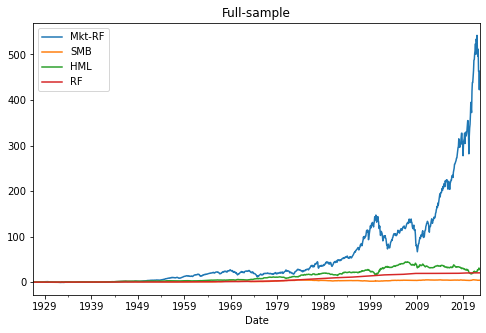

In [18]:
((factors + 1).cumprod() - 1).plot(figsize=(8,5),title = "Full-sample");

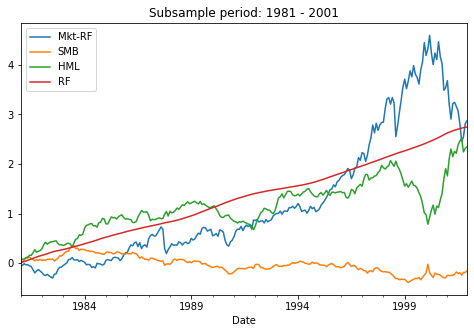

In [19]:
((factors["1981":"2001"] + 1).cumprod() - 1).plot(figsize=(8,5),title = "Subsample period: 1981 - 2001");

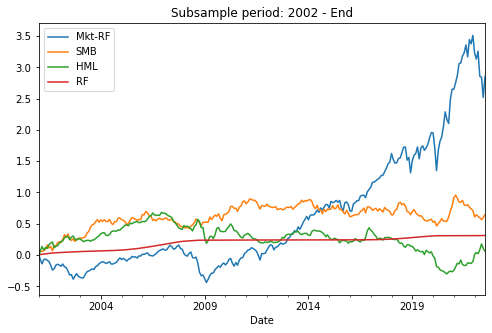

In [20]:
((factors["2001":] + 1).cumprod() - 1).plot(figsize=(8,5),title = "Subsample period: 2002 - End");

Even if SMB or HML have negative means or bad Sharpe ratios, they may still be valuable to DFA and DFAs investors due to their very small correlation to MKT. Thus, we shouldn’t rule them out just based on their stand-alone properties. We would want to examine their info ratios etc to better understand if they can be of use to an investor mostly invested in MKT.

## 3. CAPM

In [21]:
capm = pd.read_excel('dfa_analysis_data.xlsx', sheet_name = 'portfolios (total returns)')
capm = capm.set_index('Date')
capm.tail(5)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-30,-0.161458,-0.132365,-0.099863,-0.063449,-0.040988,-0.181950,-0.120671,-0.085393,-0.062858,-0.059654,...,-0.107264,-0.080398,-0.048345,-0.056840,-0.070521,-0.108609,-0.092140,-0.071498,-0.055172,-0.074225
2022-05-31,-0.058265,-0.035601,-0.009777,-0.001506,0.029569,-0.032936,-0.028180,0.020090,0.040419,0.057494,...,-0.029505,0.011418,0.040600,0.008937,0.082899,-0.030113,-0.003170,0.028100,0.064726,0.064003
2022-06-30,-0.066490,-0.042722,-0.042452,-0.065665,-0.098769,-0.020535,-0.062438,-0.067874,-0.062183,-0.129730,...,-0.072856,-0.095073,-0.111652,-0.100982,-0.132412,-0.078059,-0.055254,-0.087814,-0.120979,-0.121789
2022-07-31,0.153839,0.129453,0.082644,0.096279,0.057074,0.127958,0.136533,0.116312,0.099950,0.092214,...,0.131755,0.109898,0.069970,0.095202,0.061561,0.127225,0.055066,0.041833,0.073500,0.067965
2022-08-31,0.038098,-0.001388,0.005269,-0.000219,-0.002621,0.036693,-0.008214,-0.044867,-0.038408,-0.024716,...,-0.025402,-0.030861,-0.039483,-0.026975,-0.003650,-0.053349,-0.031101,-0.019065,0.000550,-0.030467


In [22]:
capm_ex = capm.subtract(df['RF'],axis='rows').join(df['Mkt-RF'])
capm_ex = capm_ex['1981':]
capm_ex.tail(5)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-30,-0.161558,-0.132465,-0.099963,-0.063549,-0.041088,-0.182050,-0.120771,-0.085493,-0.062958,-0.059754,...,-0.080498,-0.048445,-0.056940,-0.070621,-0.108709,-0.092240,-0.071598,-0.055272,-0.074325,-0.0946
2022-05-31,-0.058565,-0.035901,-0.010077,-0.001806,0.029269,-0.033236,-0.028480,0.019790,0.040119,0.057194,...,0.011118,0.040300,0.008637,0.082599,-0.030413,-0.003470,0.027800,0.064426,0.063703,-0.0034
2022-06-30,-0.067090,-0.043322,-0.043052,-0.066265,-0.099369,-0.021135,-0.063038,-0.068474,-0.062783,-0.130330,...,-0.095673,-0.112252,-0.101582,-0.133012,-0.078659,-0.055854,-0.088414,-0.121579,-0.122389,-0.0843
2022-07-31,0.153039,0.128653,0.081844,0.095479,0.056274,0.127158,0.135733,0.115512,0.099150,0.091414,...,0.109098,0.069170,0.094402,0.060761,0.126425,0.054266,0.041033,0.072700,0.067165,0.0957
2022-08-31,0.036198,-0.003288,0.003369,-0.002119,-0.004521,0.034793,-0.010114,-0.046767,-0.040308,-0.026616,...,-0.032761,-0.041383,-0.028875,-0.005550,-0.055249,-0.033001,-0.020965,-0.001350,-0.032367,-0.0378


In [23]:
summary_stats(capm_ex,12)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF
Mean,0.010463,0.095732,0.092913,0.119996,0.132096,0.060281,0.100629,0.106615,0.107739,0.118123,...,0.094508,0.093610,0.099772,0.112042,0.088904,0.081617,0.081088,0.067149,0.096319,0.080249
Volatility,0.272416,0.235906,0.197205,0.191374,0.207677,0.245699,0.203156,0.183069,0.179220,0.212044,...,0.176964,0.173302,0.173320,0.196819,0.163211,0.154853,0.152319,0.170305,0.205783,0.155553
Sharpe,0.038410,0.405804,0.471147,0.627023,0.636062,0.245346,0.495330,0.582375,0.601154,0.557067,...,0.534052,0.540155,0.575649,0.569265,0.544715,0.527059,0.532359,0.394288,0.468059,0.515892
VaR,-0.116482,-0.097583,-0.086441,-0.075179,-0.088348,-0.104558,-0.084043,-0.078669,-0.076411,-0.094234,...,-0.073351,-0.075638,-0.069339,-0.083283,-0.075341,-0.065553,-0.070425,-0.075613,-0.098457,-0.072765


In [24]:
print("Subsample period: 1981 - 2001")
summary_stats(capm_ex["1981":"2001"],12)

Subsample period: 1981 - 2001


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF
Mean,-0.023964,0.094285,0.103038,0.132416,0.125200,0.025539,0.091487,0.102134,0.118001,0.128594,...,0.081590,0.092239,0.107234,0.131875,0.083835,0.079926,0.075019,0.090914,0.121656,0.077257
Volatility,0.285068,0.248561,0.191066,0.181032,0.174757,0.259170,0.203269,0.166512,0.156245,0.179413,...,0.175415,0.163799,0.151236,0.160842,0.173366,0.165468,0.156822,0.155388,0.169636,0.157396
Sharpe,-0.084065,0.379323,0.539278,0.731453,0.716426,0.098540,0.450079,0.613376,0.755228,0.716751,...,0.465124,0.563125,0.709050,0.819904,0.483574,0.483031,0.478369,0.585074,0.717162,0.490847
VaR,-0.128739,-0.095527,-0.066801,-0.064608,-0.062500,-0.108519,-0.081337,-0.062718,-0.055334,-0.068019,...,-0.062817,-0.064223,-0.054605,-0.060929,-0.075409,-0.065249,-0.068632,-0.067007,-0.072897,-0.064545


In [25]:
print("Subsample period: 2002 - End")
summary_stats(capm_ex["2002":],12)

Subsample period: 2002 - End


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF
Mean,0.045447,0.097202,0.082624,0.107374,0.139102,0.095584,0.109919,0.111168,0.097312,0.107482,...,0.107635,0.095003,0.092190,0.091890,0.094054,0.083334,0.087256,0.043002,0.070572,0.083289
Volatility,0.259115,0.222815,0.203598,0.201642,0.236833,0.231289,0.203416,0.198818,0.200160,0.241053,...,0.178799,0.182785,0.193484,0.227823,0.152539,0.143599,0.147899,0.184287,0.237061,0.153972
Sharpe,0.175391,0.436246,0.405822,0.532502,0.587342,0.413267,0.540363,0.559145,0.486169,0.445886,...,0.601986,0.519752,0.476473,0.403338,0.616589,0.580326,0.589969,0.233341,0.297696,0.540933
VaR,-0.115109,-0.097969,-0.092596,-0.089407,-0.098810,-0.100574,-0.086335,-0.084674,-0.090207,-0.108135,...,-0.086023,-0.084780,-0.082046,-0.096704,-0.074582,-0.065393,-0.071413,-0.081274,-0.121746,-0.078795


In [26]:
capm_report = pd.DataFrame(index=capm.columns)
rhs = sm.add_constant(capm_ex['Mkt-RF'])
bm_residuals = pd.DataFrame(columns=capm.columns)
t_p_values = pd.DataFrame()

for portf in capm.columns:
    lhs = capm_ex[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    capm_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    capm_report.loc[portf, 'beta_hat'] = res.params['Mkt-RF']
    capm_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
    capm_report.loc[portf, 'treynor_ratio'] = 12 * capm_ex[portf].mean() / res.params['Mkt-RF']
    bm_residuals[portf] = res.resid
    t_p_values.loc[portf, 't-value'] = res.params['const']
    t_p_values.loc[portf, 't-value'] = res.tvalues['const']
    t_p_values.loc[portf, 'p-value'] = round(res.pvalues['const'], 4)

In [27]:
capm_report

,alpha_hat,beta_hat,info_ratio,treynor_ratio
SMALL LoBM,-0.098679,1.360046,-0.574986,0.007693
ME1 BM2,0.001824,1.170212,0.012154,0.081807
ME1 BM3,0.009736,1.036480,0.085739,0.089642
ME1 BM4,0.042537,0.965225,0.358477,0.124319
SMALL HiBM,0.052594,0.990693,0.377783,0.133336
ME2 BM1,-0.047520,1.343338,-0.367683,0.044874
ME2 BM2,0.010060,1.128609,0.098400,0.089162
ME2 BM3,0.024815,1.019328,0.271190,0.104593
ME2 BM4,0.030268,0.965384,0.309418,0.111602
ME2 BM5,0.029163,1.108553,0.236327,0.106556


If CAPM were true, the alphas and the information ratios would all be zero. The Treynor Ratios would all equal to the mean excess market return.

In [28]:
y = pd.DataFrame(capm_ex.drop(columns='Mkt-RF').mean(), index=capm_report.index, columns=['Mean'])
x = sm.add_constant(capm_report['beta_hat'])
cs_reg = sm.OLS(y,x,missing='drop').fit()
cs_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mean   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     8.008
Date:                Sun, 06 Nov 2022   Prob (F-statistic):            0.00950
Time:                        19:32:13   Log-Likelihood:                 123.51
No. Observations:                  25   AIC:                            -243.0
Df Residuals:                      23   BIC:                            -240.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165      0.003      5.362      0.000       0.010       0.023
beta_hat      -0.0082      0.003     -2.830      0.009      -0.014      -0.002
==============================================================================
Omnibus:                        4.531   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.975
Skew:                          -0.820   Prob(JB):                        0.226
Kurtosis:                       3.408   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x

,const,beta_hat
SMALL LoBM,1.0,1.360046
ME1 BM2,1.0,1.170212
ME1 BM3,1.0,1.036480
ME1 BM4,1.0,0.965225
SMALL HiBM,1.0,0.990693
ME2 BM1,1.0,1.343338
ME2 BM2,1.0,1.128609
ME2 BM3,1.0,1.019328
ME2 BM4,1.0,0.965384
ME2 BM5,1.0,1.108553


In [30]:
cs_reg.rsquared

0.2582451192136339

In [31]:
cs_reg.params[0]*12

0.19798077049490984

In [32]:
cs_reg.params[1]*12

-0.09815760379979337

CAPM says the market beta is the only risk associated with higher average returns, so if it is true, the r-squared would be 100%, the intercept would be 0, and the regression coefficient $\lambda_m$ should be equal to the mean excess market return

The answer can be yes and no. Our results support DFA's view that risks beyond market beta matter, but there's no enough evidence to show that size and value factors matter. 

## 4. Extension

In [33]:
data_add = df[['SMB','HML']] 
data_add = data_add['1981':]
ff3 = capm_ex.join(data_add)
ff3

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF,SMB,HML
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.054941,-0.014888,0.009909,0.005911,0.021085,-0.059733,-0.010738,-0.012684,0.007626,0.020623,...,-0.005534,0.003924,-0.071746,-0.083592,-0.074265,-0.010037,0.009464,-0.0504,0.0292,0.0672
1981-02-28,-0.044745,-0.010535,0.001444,0.009240,0.014398,-0.014473,0.005102,0.017420,0.024361,0.027939,...,0.002673,0.027240,0.021950,0.009415,-0.016450,0.020446,-0.016853,0.0057,-0.0034,0.0102
1981-03-31,0.060718,0.082395,0.073568,0.077655,0.061040,0.068082,0.071500,0.066319,0.066325,0.063175,...,0.061934,0.064868,0.017353,0.019940,-0.008875,0.022230,0.069573,0.0356,0.0354,0.0064
1981-04-30,0.018141,0.035914,0.024600,0.036523,0.044090,0.006012,0.024744,0.026586,0.026781,0.029442,...,-0.007801,0.006253,-0.038311,-0.053508,-0.038006,0.010439,-0.040374,-0.0211,0.0440,0.0228
1981-05-31,0.038153,0.037824,0.032399,0.013389,0.016837,0.050452,0.010304,0.016889,-0.008609,0.013558,...,-0.000759,0.021978,0.004288,-0.032791,-0.031355,0.026669,-0.005979,0.0011,0.0200,-0.0042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.161558,-0.132465,-0.099963,-0.063549,-0.041088,-0.182050,-0.120771,-0.085493,-0.062958,-0.059754,...,-0.056940,-0.070621,-0.108709,-0.092240,-0.071598,-0.055272,-0.074325,-0.0946,-0.0141,0.0619
2022-05-31,-0.058565,-0.035901,-0.010077,-0.001806,0.029269,-0.033236,-0.028480,0.019790,0.040119,0.057194,...,0.008637,0.082599,-0.030413,-0.003470,0.027800,0.064426,0.063703,-0.0034,-0.0185,0.0841
2022-06-30,-0.067090,-0.043322,-0.043052,-0.066265,-0.099369,-0.021135,-0.063038,-0.068474,-0.062783,-0.130330,...,-0.101582,-0.133012,-0.078659,-0.055854,-0.088414,-0.121579,-0.122389,-0.0843,0.0209,-0.0597


In [34]:
ff_report = pd.DataFrame(index=capm.columns)
rhs = sm.add_constant(ff3[['Mkt-RF','SMB','HML']])

for portf in capm.columns:
    lhs = ff3[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    ff_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    ff_report.loc[portf, 'beta_mkt'] = res.params['Mkt-RF']
    ff_report.loc[portf, 'beta_s'] = res.params['SMB']       
    ff_report.loc[portf, 'beta_v'] = res.params['HML']                          
    ff_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
    ff_report.loc[portf, 'treynor_ratio'] = 12 * ff3[portf].mean() / res.params['Mkt-RF']
ff_report

,alpha_hat,beta_mkt,beta_s,beta_v,info_ratio,treynor_ratio
SMALL LoBM,-0.083200,1.116175,1.372219,-0.262905,-0.928832,0.009374
ME1 BM2,0.005912,0.972187,1.314518,-0.012622,0.084678,0.098471
ME1 BM3,0.000086,0.921626,1.046313,0.277420,0.001869,0.100814
ME1 BM4,0.023969,0.878290,1.057983,0.476788,0.503265,0.136624
SMALL HiBM,0.024209,0.935865,1.060999,0.695626,0.323126,0.141148
ME2 BM1,-0.029881,1.142436,1.015023,-0.332342,-0.499362,0.052765
ME2 BM2,0.007081,1.012003,0.901247,0.120149,0.142076,0.099435
ME2 BM3,0.008835,0.972962,0.707765,0.398220,0.170470,0.109578
ME2 BM4,0.006232,0.940884,0.742195,0.579725,0.138965,0.114508
ME2 BM5,-0.005284,1.093340,0.921874,0.822365,-0.112717,0.108038


In [35]:
x_new = sm.add_constant(ff_report[['beta_mkt','beta_s','beta_v']])
ff3_reg = sm.OLS(y,x_new,missing='drop').fit()
ff3_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mean   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     6.121
Date:                Sun, 06 Nov 2022   Prob (F-statistic):            0.00369
Time:                        19:32:14   Log-Likelihood:                 127.63
No. Observations:                  25   AIC:                            -247.3
Df Residuals:                      21   BIC:                            -242.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0150      0.005      3.311      0.003       0.006       0.024
beta_mkt      -0.0080      0.004     -1.845      0.079      -0.017       0.001
beta_s         0.0002      0.001      0.361      0.721      -0.001       0.002
beta_v         0.0030      0.001      3.705      0.001       0.001       0.005
==============================================================================
Omnibus:                       15.621   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.758
Skew:                          -1.490   Prob(JB):                     0.000230
Kurtosis:                       5.685   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(f"R-squared: {ff3_reg.rsquared}")
print(f"Intercept: {ff3_reg.params[0] * 12}")
print(f"Regression coefficient for market beta: {ff3_reg.params[1]}")
print(f"Regression coefficient for size beta: {ff3_reg.params[2]}")
print(f"Regression coefficient for value beta: {ff3_reg.params[3]}")

R-squared: 0.46651395727533507
Intercept: 0.17974028023525104
Regression coefficient for market beta: -0.007973010535925418
Regression coefficient for size beta: 0.00024114392551867828
Regression coefficient for value beta: 0.00301750270474396


In [37]:
def tangency_portfolio_rfr(asset_return,cov_matrix, cov_diagnolize = False):
    """ 
        Returns the tangency portfolio weights in a (1 x n) vector
        Inputs: 
            asset_return - return for each asset (n x 1) Vector
            cov_matrix = nxn covariance matrix for the assets
    """
    if cov_diagnolize:
        asset_cov = np.diag(np.diag(cov_matrix))
    else:
        asset_cov = np.array(cov_matrix)
    inverted_cov= np.linalg.inv(asset_cov)
    one_vector = np.ones(len(cov_matrix.index))
    
    den = (one_vector @ inverted_cov) @ (asset_return)
    num =  inverted_cov @ asset_return
    return (1/den) * num

In [38]:
ret = capm_ex.drop(columns='Mkt-RF').mean() 
cov_mt = capm_ex.drop(columns='Mkt-RF').cov() 
port_tan = pd.DataFrame(tangency_portfolio_rfr(ret,cov_mt), index=ff_report.index, columns=['whatever'])
port_tan

,whatever
SMALL LoBM,-2.257581
ME1 BM2,0.897558
ME1 BM3,-0.061187
ME1 BM4,1.356994
SMALL HiBM,0.940930
ME2 BM1,-0.316888
ME2 BM2,0.862422
ME2 BM3,0.255905
ME2 BM4,-0.360914
ME2 BM5,-0.862411


In [39]:
ex_ret_tan = capm['1981':] @ port_tan
ex_ret_tan
ex_ret_tan.mean()

whatever    0.036844
dtype: float64

In [40]:
tan_report = pd.DataFrame(index=capm.columns)
rhs = sm.add_constant(ex_ret_tan)

for portf in capm.columns:
    lhs = ff3[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    tan_report.loc[portf, 'alpha_hat'] = res.params[0] * 12
    tan_report.loc[portf, 'beta_hat'] = res.params[1]                         
    tan_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
tan_report

,alpha_hat,beta_hat,info_ratio
SMALL LoBM,0.001703,0.019813,0.006254
ME1 BM2,-0.006601,0.231455,-0.028622
ME1 BM3,-0.006770,0.225461,-0.035411
ME1 BM4,-0.009073,0.291926,-0.050171
SMALL HiBM,-0.009477,0.320207,-0.048352
ME2 BM1,-0.002773,0.142616,-0.011376
ME2 BM2,-0.007083,0.243622,-0.036079
ME2 BM3,-0.007971,0.259170,-0.045700
ME2 BM4,-0.008428,0.262745,-0.049538
ME2 BM5,-0.008877,0.287246,-0.043751


In [41]:
# The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
y = capm_ex.drop(columns='Mkt-RF').mean() 

# The regressor, (x): the market beta from each of the n = 25 time-series regressions.
X = sm.add_constant(tan_report['beta_hat'])

res = sm.OLS(y,X,missing='drop').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.789e+04
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           4.19e-42
Time:                        19:32:15   Log-Likelihood:                 221.37
No. Observations:                  25   AIC:                            -438.7
Df Residuals:                      23   BIC:                            -436.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   2.84e-05      6.127      0.000       0.000       0.000
beta_hat       0.0336      0.000    279.091      0.000       0.033       0.034
==============================================================================
Omnibus:                        4.564   Durbin-Watson:                   0.746
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                2.712
Skew:                          -0.607   Prob(JB):                        0.258
Kurtosis:                       4.063   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
print(f"R-squared: {res.rsquared}")
print(f"Intercept: {res.params[0] * 12}")
print(f"Regression coefficient for tangency beta: {res.params[1]}")

R-squared: 0.9997048065997343
Intercept: 0.0020906264004459585
Regression coefficient for tangency beta: 0.03361162928224441


In [43]:
print(f"Expected premium to tangency portfolio: {ex_ret_tan.mean()}")

Expected premium to tangency portfolio: whatever    0.036844
dtype: float64


In [44]:
# Note: alpha_hat has already been annualized in the previous question
MAE_alpha = (100 * capm_report['alpha_hat']).abs().mean()
print('MAE = {:.2f} %'.format(MAE_alpha))

MAE = 2.43 %


In [45]:
T = capm_ex.drop(columns='Mkt-RF').dropna().shape[0]
SR = capm_ex['Mkt-RF'].mean() / capm_ex['Mkt-RF'].std()
Sigma = bm_residuals.cov()
Sigma_inv = pd.DataFrame(np.linalg.inv(Sigma), index=Sigma.index, columns=Sigma.columns)
alpha = capm_report['alpha_hat']
H = T * (1 + SR**2)**(-1) * alpha @ Sigma_inv @ alpha
print('H = {:.2f}'.format(H))
pvalue = 1 - stats.chi2.cdf(H, df=25)
print('p-value = {:.4f}'.format(pvalue))

H = 20068.02
p-value = 0.0000


In [46]:
display(t_p_values.sort_values(by='p-value', ascending=False))

,t-value,p-value
ME1 BM2,0.077516,0.9382
ME4 BM1,-0.224970,0.8221
ME5 BM4,-0.339704,0.7342
ME1 BM3,0.546845,0.5847
ME2 BM2,0.627595,0.5306
BIG HiBM,0.718536,0.4728
ME5 BM2,0.810185,0.4182
ME4 BM2,0.934223,0.3506
ME5 BM3,1.024924,0.3059
BIG LoBM,1.115155,0.2653


(c) By definition, a joint test is stricter than testing the conditions individually.In our case, we can see that most of the alphas (20 alphas) are not significant (as $p$-value $\geq$ 0.05) while 5 alphas are signficant (as $p$-value $\leq$ 0.05) as judged by their individual $t$-stats, yet all of them are jointly significant as judged by this joint test.

(d) We have demonstrated that an LFM is exactly the same as asserting that a set of factors spans the MV frontier, (and thus spans the tangency portfolio.) Thus, this test can be interpreted as checking whether investing in the alphas gets beyond the tangency portfolio. The test stat is basically comparing the square SR of the alphas to the square SR of the factors.